<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/Keras/digits_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


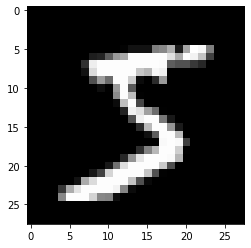

In [ ]:
plt.imshow(X_train[0], cmap="gray");

In [ ]:
y_train[0]

5

In [ ]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train, X_test = X_train/255, X_test/255

In [ ]:
from keras.backend import categorical_crossentropy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import MaxPooling2D, Conv2D
from keras.optimizers import Adam

def my_convnet_1():
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape=(28,28,1), activation="relu"))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(16, (3,3), activation="relu"))
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())
    model.add(Dense(100, activation="relu"))

    model.add(Dropout(0.5))

    model.add(Dense(10, activation="softmax"))

    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
model = my_convnet_1()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=8,
    validation_split=0.2,
    batch_size=256,
    verbose=1,
    shuffle=True,
    )

Epoch 1/8
188/188 [==============================] - 10s 9ms/step - loss: 0.2785 - accuracy: 0.9125 - val_loss: 0.0598 - val_accuracy: 0.9822
Epoch 2/8
188/188 [==============================] - 1s 6ms/step - loss: 0.1021 - accuracy: 0.9695 - val_loss: 0.0593 - val_accuracy: 0.9825
Epoch 3/8
188/188 [==============================] - 1s 7ms/step - loss: 0.0813 - accuracy: 0.9757 - val_loss: 0.0523 - val_accuracy: 0.9868
Epoch 4/8
188/188 [==============================] - 1s 8ms/step - loss: 0.0775 - accuracy: 0.9771 - val_loss: 0.0464 - val_accuracy: 0.9884
Epoch 5/8
188/188 [==============================] - 1s 6ms/step - loss: 0.0696 - accuracy: 0.9780 - val_loss: 0.0457 - val_accuracy: 0.9893
Epoch 6/8
188/188 [==============================] - 1s 6ms/step - loss: 0.0689 - accuracy: 0.9785 - val_loss: 0.0490 - val_accuracy: 0.9879
Epoch 7/8
188/188 [==============================] - 1s 5ms/step - loss: 0.0669 - accuracy: 0.9799 - val_loss: 0.0444 - val_accuracy: 0.9867
Epoch 8/8
18

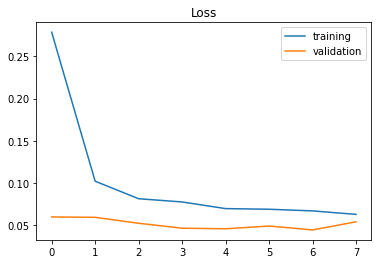

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['training', 'validation'])
plt.show()

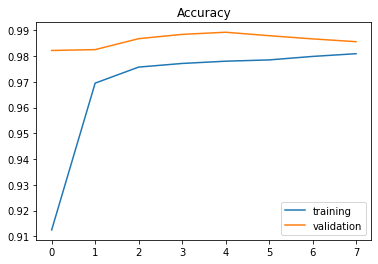

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
score = model.evaluate(X_test,y_test, verbose=0)

In [ ]:
print('error', score[0])
print('accuracy', score[1])

error 0.04045004025101662
accuracy 0.9865999817848206


In [ ]:
model.save('CNN_model.h5')

In [ ]:
from google.colab import files
files.download('CNN_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
X_test.shape

(10000, 28, 28, 1)

313/313 [==============================] - 1s 4ms/step


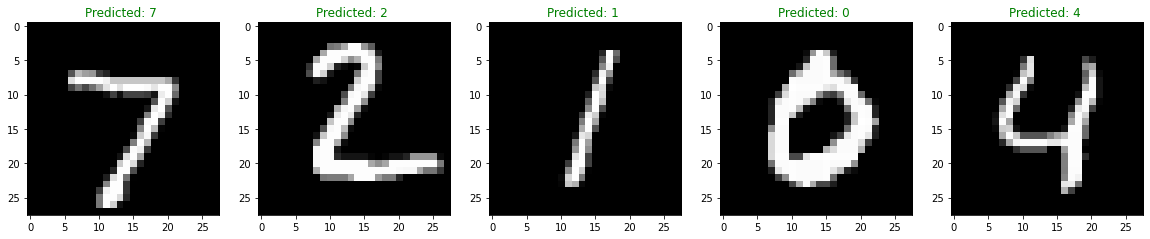

In [61]:
pred = model.predict(X_test)

pred = np.argmax(pred, axis=1)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_test[0:5], pred[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.squeeze(image), cmap=plt.cm.gray)
    pred_label = label
    true_label = np.argmax(y_test[index])
    if pred_label == true_label:
        plt.title('Predicted: %i ' % pred_label, color='green')
    else:
        plt.title('Predicted: %i ' % pred_label, color='red')

plt.show()